<a href="https://colab.research.google.com/github/psrana/Machine-Learning-using-PyCaret/blob/main/01_PyCaret_for_Regression_with_Results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# **PyCaret for Regression**
---
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

---

### **Self Learning Resource**
1. Tutorial on Pycaret <a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a> 

2. Documentation on Pycaret-Regression: <a href="https://pycaret.org/regression/"> Click Here </a>

---

### **In this tutorial we will learn:**

- Getting Data: How to import data from PyCaret repository
- Setting up Environment: How to setup an experiment in PyCaret and get started with building regression models
- Create Model: How to create a model, perform cross validation and evaluate regression metrics
- Tune Model: How to automatically tune the hyperparameters of a regression model
- Plot Model: How to analyze model performance using various plots
- Finalize Model: How to finalize the best model at the end of the experiment
- Predict Model: How to make prediction on new / unseen data
- Save / Load Model: How to save / load a model for future use

---



#### **(a) Install Pycaret**

In [1]:
!pip install pycaret &> /dev/null
print ("Pycaret installed sucessfully!!")

Pycaret installed sucessfully!!


#### **(b) Get the version of the pycaret**

In [2]:
from pycaret.utils import version
version()

'2.3.1'

---
# **1. Regression: Basics**
---

### **1.1 Loading Dataset - Loading dataset from pycaret**

In [3]:
from pycaret.datasets import get_data

# No output

---
### **1.2 Get the list of datasets available in pycaret (55)**
---

In [4]:
# Internet connection is required
dataSets = get_data('index')

,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,None,None,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,None,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,None,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,None,683,10,N
6,credit,Multivariate,Classification (Binary),default,None,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,None,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,None,10000,14,N
9,employee,Multivariate,Classification (Binary),left,None,14999,10,N


---
### **1.3 Get boston dataset**
---

In [5]:
bostonDataSet = get_data("boston")    # SN is 46
# This is regression dataset. The values in medv are continuous values

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


Read data from file

In [6]:
# import pandas as pd
# bostonDataSet = pd.read_csv("myFile.csv")

---
### **1.4 Parameter setting for all regression models**
- Train/Test division
- Sampling
- Normalization
- Transformation
- PCA (Dimention Reduction)
- Handaling of Outliers
- Feature Selection
---

In [7]:
from pycaret.regression import *
s = setup(data =  bostonDataSet, target='medv', silent=True)

,Description,Value
0,session_id,7548
1,Target,medv
2,Original Data,"(506, 14)"
3,Missing Values,False
4,Numeric Features,11
5,Categorical Features,2
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(354, 21)"


---
### **1.5 Run and compare the Model Performance**
---

In [8]:
cm = compare_models()
# Explore more parameters

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.9672,7.0693,2.6475,0.9007,0.1238,0.1004,0.451
lightgbm,Light Gradient Boosting Machine,2.0681,9.2109,2.9650,0.8742,0.1390,0.1072,0.084
gbr,Gradient Boosting Regressor,2.0403,9.1384,2.9291,0.8735,0.1395,0.1081,0.093
rf,Random Forest Regressor,2.1846,10.1720,3.1139,0.8604,0.1439,0.1140,0.511
ada,AdaBoost Regressor,2.4595,11.6412,3.3513,0.8383,0.1576,0.1309,0.096
ridge,Ridge Regression,3.0808,18.1953,4.1923,0.7521,0.2115,0.1593,0.012
lr,Linear Regression,3.0930,18.1988,4.1954,0.7517,0.2102,0.1592,0.279
br,Bayesian Ridge,3.0776,18.2842,4.2020,0.7514,0.2097,0.1592,0.014
dt,Decision Tree Regressor,2.9816,19.0919,4.1982,0.7425,0.1804,0.1487,0.019
lasso,Lasso Regression,3.4107,22.1956,4.6567,0.6996,0.2093,0.1665,0.015


---
### **1.6 Three line of code for model comparison for "Insurance" dataset**
---

In [9]:
from pycaret.datasets import get_data
from pycaret.regression import *

insuranceDataSet = get_data("insurance")
s = setup(data = insuranceDataSet, target='charges', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2575.5172,2.182778e+07,4608.7023,0.8385,0.4135,0.2905,0.086
rf,Random Forest Regressor,2743.8462,2.368065e+07,4826.8219,0.8242,0.4426,0.3136,0.559
lightgbm,Light Gradient Boosting Machine,2903.0806,2.398176e+07,4858.0164,0.8214,0.5401,0.3565,0.051
et,Extra Trees Regressor,2793.4775,2.833905e+07,5288.8824,0.7884,0.4741,0.3243,0.500
ada,AdaBoost Regressor,4177.0798,2.835124e+07,5303.6621,0.7846,0.6097,0.6926,0.030
ridge,Ridge Regression,4204.7922,3.779907e+07,6112.8745,0.7258,0.5739,0.4193,0.013
br,Bayesian Ridge,4202.0740,3.780100e+07,6113.2013,0.7257,0.5754,0.4188,0.014
lr,Linear Regression,4192.2080,3.780669e+07,6114.2987,0.7255,0.5802,0.4169,0.014
lasso,Lasso Regression,4191.7781,3.779945e+07,6113.6300,0.7255,0.5816,0.4169,0.016
llar,Lasso Least Angle Regression,4189.1612,3.780742e+07,6113.7348,0.7255,0.5644,0.4172,0.018


---
### **1.7 Three line of code for model comparison for "House" dataset**
---

In [10]:
from pycaret.datasets import get_data
from pycaret.regression import *

houseDataSet = get_data("house")
s = setup(data = houseDataSet, target='SalePrice', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,17551.9994,9.335490e+08,29569.8252,0.8463,0.1494,0.1051,0.732
lightgbm,Light Gradient Boosting Machine,18173.3172,9.606042e+08,30350.9727,0.8415,0.1532,0.1083,0.236
rf,Random Forest Regressor,18913.0387,1.125971e+09,32660.9956,0.8132,0.1628,0.1145,2.364
llar,Lasso Least Angle Regression,18546.2162,1.291620e+09,34141.0129,0.7799,0.1888,0.1106,0.422
ada,AdaBoost Regressor,25705.2963,1.417207e+09,37403.2954,0.7664,0.2094,0.1682,0.466
ridge,Ridge Regression,19664.8086,1.428652e+09,35655.0424,0.7614,0.1748,0.1175,0.055
lasso,Lasso Regression,19351.7104,1.446116e+09,35971.5521,0.7541,0.1993,0.1165,0.186
et,Extra Trees Regressor,22005.9864,1.533798e+09,38319.3502,0.7476,0.1833,0.1288,2.508
en,Elastic Net,21234.0262,1.656718e+09,38441.7588,0.7230,0.1691,0.1238,0.191
omp,Orthogonal Matching Pursuit,18495.4739,1.677920e+09,36555.1931,0.7119,0.1710,0.1094,0.034


---
# **2. Regression: Advance - 1**
---

#### **2.1 Model Performance using data "Normalization"**

In [11]:
s = setup(data = bostonDataSet, target = 'medv', normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

#normalize_method = {zscore, minmax, maxabs, robust}

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0417,9.2665,2.9466,0.8720,0.1429,0.1082,0.444
gbr,Gradient Boosting Regressor,2.1592,10.0966,3.0867,0.8591,0.1536,0.1148,0.095
rf,Random Forest Regressor,2.1709,10.4544,3.1563,0.8540,0.1545,0.1158,0.509
lightgbm,Light Gradient Boosting Machine,2.3007,12.2691,3.3832,0.8353,0.1620,0.1233,0.039
knn,K Neighbors Regressor,2.6594,15.1630,3.8189,0.8010,0.1633,0.1287,0.061
ada,AdaBoost Regressor,2.7210,14.4834,3.6908,0.7940,0.1795,0.1476,0.093
dt,Decision Tree Regressor,2.9161,18.2397,4.1975,0.7419,0.2003,0.1477,0.016
br,Bayesian Ridge,3.0606,18.8163,4.2948,0.7414,0.2270,0.1560,0.014
ridge,Ridge Regression,3.0936,18.8802,4.3082,0.7400,0.2291,0.1573,0.014
lr,Linear Regression,3.1045,18.9552,4.3185,0.7390,0.2303,0.1577,0.014


---
### **2.2 Model Performance using "Feature Selection"**
---

In [12]:
s = setup(data = bostonDataSet, target = 'medv', feature_selection = True, feature_selection_threshold = 0.9, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.2333,11.5437,3.2768,0.8404,0.1501,0.1150,0.444
gbr,Gradient Boosting Regressor,2.2487,11.6528,3.2693,0.8366,0.1531,0.1170,0.097
rf,Random Forest Regressor,2.3575,13.5977,3.5407,0.8144,0.1580,0.1202,0.510
lightgbm,Light Gradient Boosting Machine,2.4635,13.6660,3.5955,0.8121,0.1621,0.1258,0.039
ada,AdaBoost Regressor,2.7269,16.6389,3.9934,0.7680,0.1804,0.1436,0.093
dt,Decision Tree Regressor,3.0496,21.5964,4.5034,0.7143,0.2070,0.1587,0.017
lr,Linear Regression,3.4893,25.6676,4.9208,0.6717,0.2527,0.1763,0.013
ridge,Ridge Regression,3.4693,25.8383,4.9294,0.6715,0.2636,0.1767,0.014
br,Bayesian Ridge,3.5185,26.6405,5.0119,0.6618,0.2703,0.1793,0.014
en,Elastic Net,3.8338,31.0114,5.4287,0.6055,0.2758,0.1839,0.014


---
### **2.3 Model Performance using "Outlier Removal"**
---

In [13]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,1.9469,7.9527,2.7527,0.8827,0.1265,0.0990,0.451
gbr,Gradient Boosting Regressor,2.0667,9.4401,2.8955,0.8661,0.1373,0.1068,0.091
rf,Random Forest Regressor,2.1141,9.9440,2.9692,0.8575,0.1396,0.1104,0.509
lightgbm,Light Gradient Boosting Machine,2.1797,10.6409,3.0521,0.8502,0.1348,0.1090,0.039
ada,AdaBoost Regressor,2.5725,13.3359,3.5250,0.8064,0.1628,0.1339,0.092
dt,Decision Tree Regressor,2.8802,17.5934,3.9450,0.7490,0.1889,0.1490,0.016
ridge,Ridge Regression,2.9756,17.5036,4.0487,0.7473,0.2205,0.1533,0.013
lr,Linear Regression,2.9833,17.5430,4.0532,0.7469,0.2225,0.1538,0.013
br,Bayesian Ridge,2.9701,17.6438,4.0684,0.7445,0.2147,0.1524,0.014
lar,Least Angle Regression,3.2810,21.4263,4.4838,0.6764,0.2442,0.1690,0.017


---
### **2.4 Model Performance using "Transformation"**
---

In [14]:
s = setup(data = bostonDataSet, target = 'medv', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2.1953,8.3473,2.8497,0.8819,0.1444,0.1161,0.092
rf,Random Forest Regressor,2.2168,9.1829,2.9570,0.8795,0.1439,0.1163,0.501
et,Extra Trees Regressor,2.1738,9.8099,2.9943,0.8766,0.1379,0.1100,0.450
ada,AdaBoost Regressor,2.5934,11.0381,3.2612,0.8468,0.1688,0.1419,0.094
lightgbm,Light Gradient Boosting Machine,2.4271,12.1036,3.3776,0.8467,0.1595,0.1257,0.040
knn,K Neighbors Regressor,2.8261,17.2318,4.0407,0.7684,0.1809,0.1419,0.062
dt,Decision Tree Regressor,2.8962,16.6474,3.9897,0.7658,0.1931,0.1523,0.015
br,Bayesian Ridge,3.3157,20.4448,4.4028,0.7488,0.2177,0.1746,0.014
ridge,Ridge Regression,3.3548,20.5828,4.4250,0.7463,0.2192,0.1765,0.014
lar,Least Angle Regression,3.3750,20.6475,4.4360,0.7450,0.2200,0.1774,0.017


---
### **2.5 Model Performance using "PCA"**
---

In [15]:
s = setup(data = bostonDataSet, target = 'medv', pca = True, pca_method = 'linear', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,4.7579,50.1766,6.9202,0.3842,0.2812,0.2364,0.434
lightgbm,Light Gradient Boosting Machine,4.8950,50.6940,6.9594,0.3747,0.2826,0.2395,0.030
gbr,Gradient Boosting Regressor,4.7525,52.1176,6.9834,0.3685,0.2827,0.2365,0.058
knn,K Neighbors Regressor,4.8988,50.4595,7.0002,0.3616,0.2829,0.2418,0.061
et,Extra Trees Regressor,4.8876,54.2282,7.1564,0.3354,0.2892,0.2445,0.409
lr,Linear Regression,5.3394,58.2617,7.4706,0.2877,0.2995,0.2579,0.014
ridge,Ridge Regression,5.3394,58.2617,7.4706,0.2877,0.2995,0.2579,0.013
lar,Least Angle Regression,5.3394,58.2617,7.4706,0.2877,0.2995,0.2579,0.014
lasso,Lasso Regression,5.3410,58.2647,7.4711,0.2876,0.2996,0.2580,0.015
en,Elastic Net,5.3403,58.2628,7.4709,0.2876,0.2995,0.2580,0.014


---
### **2.6 Model Performance using "Outlier Removal" + "Normalization"**
---

In [16]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0944,9.5989,2.9828,0.8770,0.1411,0.1076,0.449
gbr,Gradient Boosting Regressor,2.2069,9.8574,3.0758,0.8706,0.1483,0.1155,0.091
rf,Random Forest Regressor,2.2991,11.6036,3.2677,0.8537,0.1533,0.1187,0.500
lightgbm,Light Gradient Boosting Machine,2.4453,12.5609,3.4327,0.8446,0.1595,0.1251,0.039
ada,AdaBoost Regressor,2.7620,14.8197,3.7711,0.8060,0.1834,0.1507,0.093
dt,Decision Tree Regressor,3.1009,19.4040,4.2898,0.7403,0.2175,0.1684,0.017
knn,K Neighbors Regressor,3.0696,23.4017,4.5924,0.7349,0.1794,0.1380,0.061
br,Bayesian Ridge,3.4865,24.7083,4.8472,0.6969,0.2462,0.1742,0.013
ridge,Ridge Regression,3.5338,24.7467,4.8591,0.6946,0.2504,0.1764,0.014
lr,Linear Regression,3.5521,24.8497,4.8733,0.6925,0.2530,0.1772,0.012


---
### **2.7 Model Performance using "Outlier Removal" + "Normalization" + "Transformation"**
---

In [17]:
s = setup(data = bostonDataSet, target = 'medv', remove_outliers = True, outliers_threshold = 0.05, normalize = True, normalize_method = 'zscore', transformation = True, transformation_method = 'yeo-johnson', silent=True)
cm = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,2.0459,9.2277,2.9296,0.8554,0.1313,0.1032,0.444
gbr,Gradient Boosting Regressor,2.1264,10.3774,3.1065,0.8288,0.1449,0.1107,0.090
rf,Random Forest Regressor,2.2446,11.2221,3.2544,0.8208,0.1440,0.1127,0.511
lightgbm,Light Gradient Boosting Machine,2.3255,12.0976,3.3920,0.8115,0.1427,0.1117,0.038
ada,AdaBoost Regressor,2.8007,15.4455,3.8236,0.7639,0.1768,0.1490,0.097
knn,K Neighbors Regressor,2.8570,21.1692,4.4358,0.7001,0.1781,0.1345,0.062
ridge,Ridge Regression,3.3023,21.1415,4.5220,0.6801,0.2091,0.1674,0.014
br,Bayesian Ridge,3.2681,21.2289,4.5233,0.6799,0.2084,0.1659,0.014
lr,Linear Regression,3.3208,21.2061,4.5312,0.6786,0.2101,0.1683,0.015
huber,Huber Regressor,3.0957,22.4442,4.5891,0.6708,0.2079,0.1519,0.025


---
# **3. Regression: Advance - 2**
---

### **3.1 Build a single model - "RandomForest"**

In [18]:
from pycaret.datasets import get_data
from pycaret.regression import *

bostonDataSet = get_data("boston")    # SN is 46
s = setup(data =  bostonDataSet, target='medv', silent=True)

rfModel = create_model('rf')
# Explore more parameters

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.0792,32.5500,5.7053,0.6370,0.1946,0.1344
1,2.2493,10.1951,3.1930,0.9091,0.1420,0.1162
2,3.2015,19.9810,4.4700,0.7922,0.2051,0.1640
3,2.2834,10.8912,3.3002,0.9118,0.1124,0.0919
4,1.9864,7.5548,2.7486,0.9004,0.1218,0.0910
5,1.9601,5.1870,2.2775,0.9307,0.1105,0.1017
6,2.3448,15.0202,3.8756,0.5935,0.1982,0.1496
7,2.3716,20.4679,4.5241,0.5204,0.1662,0.1189
8,2.1615,8.2402,2.8706,0.8831,0.1588,0.1184
9,3.1431,20.5922,4.5379,0.8611,0.1689,0.1301


---
### **3.2 Other models**
---

-	'ada' - AdaBoost Regressor
-	'br' - Bayesian Ridge
-	'dt' - Decision Tree Regressor
-	'en'	- Elastic Net
-	'et' - Extra Trees Regressor
-	'gbr' - Gradient Boosting Regressor
-	'huber' - Huber Regressor
-	'knn' - K Neighbors Regressor
-	'llar' - Lasso Least Angle Regression
-	'lasso' - Lasso Regression
-	'lar' - Least Angle Regression
-	'lightgbm'	- Light Gradient Boosting Machine
-	'lr' - Linear Regression
-	'omp' - Orthogonal Matching Pursuit
-	'par' - Passive Aggressive Regressor
-	'rf' - Random Forest Regressor
-	'ridge' - Ridge Regression

---
### **3.3 Save the trained model**
---

In [19]:
sm = save_model(rfModel, 'rfModelFile')

Transformation Pipeline and Model Succesfully Saved


---
### **3.4 Load the model**
---

In [20]:
rfModel = load_model('rfModelFile')

Transformation Pipeline and Model Successfully Loaded


---
### **3.5 Make prediction on the new dataset**
---

#### **Get new dataset**

In [21]:
# Select top 10 rows from boston dataset
newDataSet = get_data("boston").iloc[:10]

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


#### **Make prediction on new dataset**

In [22]:
newPredictions = predict_model(rfModel, data = newDataSet)
newPredictions

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,Label
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,25.282000
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,23.127000
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,35.234001
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,33.972001
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,35.810001
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,24.113000
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,20.014000
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,23.299000
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,16.853000
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,19.253000


---
### **3.6 Scatter plot b/w actual and predicted**
---

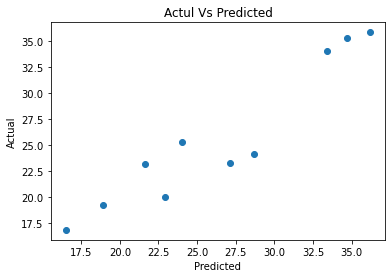

In [23]:
import matplotlib.pyplot as plt

predicted = newPredictions.iloc[:,-1]     # Last column
actual = newPredictions.iloc[:,-2]        # 2nd last column

plt.scatter(actual, predicted)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Actul Vs Predicted')
plt.savefig("result-scatter-plot.jpg", dpi=300)
plt.show()

---
### **3.7 Save prediction results to csv**
---

In [24]:
newPredictions.to_csv("NewPredictions.csv")
# No output

---
### **3.8 Plot the Model**
---
##### Following parameter can be plot for model
- Prediction Error Plot    - 'error'
- Learning Curve           - 'learning'
- Validation Curve         - 'vc'
- Feature Importance       - 'feature'
- Model Hyperparameter     - 'parameter'

---
##### **3.8.1 Create RandomForest or any other model**
---

In [25]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,3.0792,32.5500,5.7053,0.6370,0.1946,0.1344
1,2.2493,10.1951,3.1930,0.9091,0.1420,0.1162
2,3.2015,19.9810,4.4700,0.7922,0.2051,0.1640
3,2.2834,10.8912,3.3002,0.9118,0.1124,0.0919
4,1.9864,7.5548,2.7486,0.9004,0.1218,0.0910
5,1.9601,5.1870,2.2775,0.9307,0.1105,0.1017
6,2.3448,15.0202,3.8756,0.5935,0.1982,0.1496
7,2.3716,20.4679,4.5241,0.5204,0.1662,0.1189
8,2.1615,8.2402,2.8706,0.8831,0.1588,0.1184
9,3.1431,20.5922,4.5379,0.8611,0.1689,0.1301


---
##### **3.8.2 Plot Error (Scatter Plot)**
---

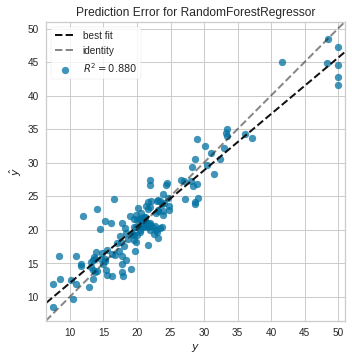

In [26]:
plot_model(rf, plot='error')

---
##### **3.8.3 Plot Learning Curve**
---

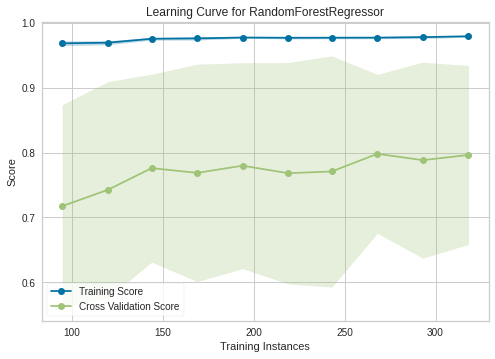

In [27]:
plot_model(rf, plot='learning')

---
##### **3.8.4 Plot Validation Curve**
---

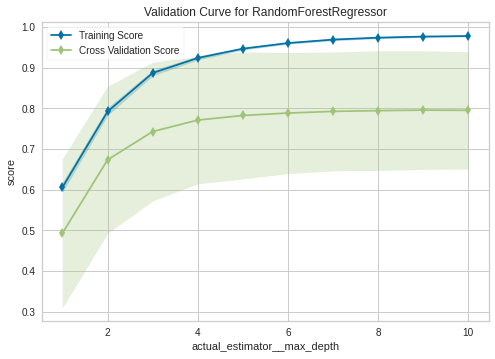

In [28]:
plot_model(rf, plot='vc')

---
### **3.9 Feature Importance**
---

##### **3.9.1 Feature Importance using Random Forest**

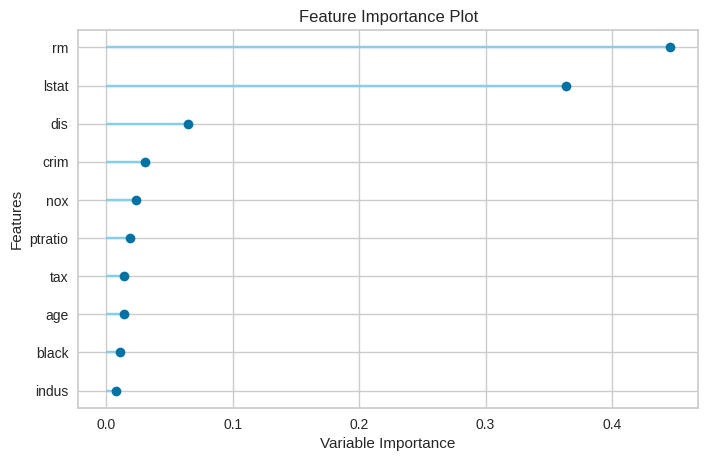

In [29]:
rfModel = create_model('rf', verbose=False)
plot_model(rfModel, plot='feature')

---
##### **3.9.2 Feature Importance using Extra Trees Regressor**
---

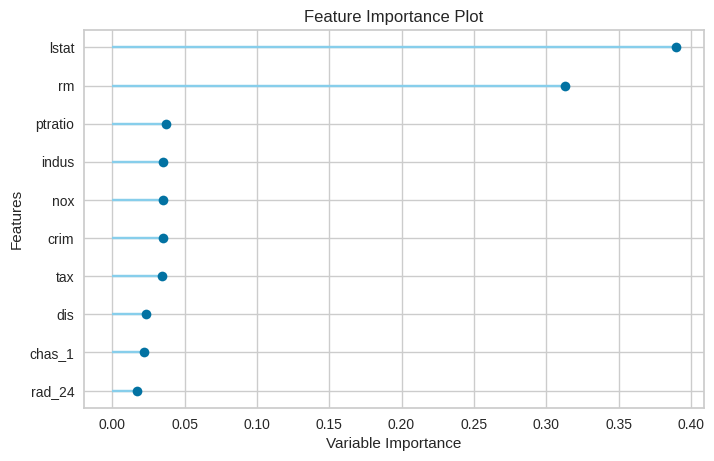

In [30]:
etModel = create_model('et', verbose=False)
plot_model(etModel, plot='feature')

---
##### **3.9.3 Feature Importance using Decision Tree**
---

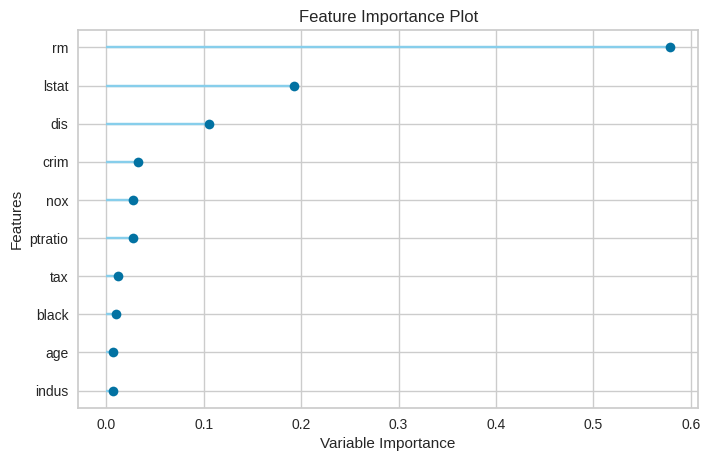

In [31]:
dtModel = create_model('dt', verbose=False)
plot_model(dtModel, plot='feature')

---
##### **3.10 Deploy the model on AWS</span>  <a href="https://pycaret.org/regression/#deploy-model">Click Here</a>**
---

#### **Self Learning Resource**

###### 1. Tutorial on Pycaret <a href="https://pycaret.readthedocs.io/en/latest/tutorials.html"> Click Here</a> 

###### 2. Documentation on Pycaret-Regression: <a href="https://pycaret.org/regression/"> Click Here </a>